# Ocular Disease Recognition
## CNN (Convolutional Neural Networks)

Convolutional Neural Networks, or CNNs for short, are a powerful type of neural network commonly used in computer vision tasks. They are particularly well-suited to tasks like image classification and object detection because they are able to automatically learn and extract relevant features from input images. CNNs consist of multiple layers, each of which performs a different type of processing on the input data. These layers typically include convolutional layers, which extract features from the input images, and pooling layers, which downsample the output of the convolutional layers. By stacking these layers on top of one another, a CNN is able to learn increasingly complex representations of the input data.

In [1]:
# Import necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Dataset



Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.

Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

* Normal (N),
* Diabetes (D),
* Glaucoma (G),
* Cataract (C),
* Age related Macular Degeneration (A),
* Hypertension (H),
* Pathological Myopia (M),
* Other diseases/abnormalities (O)



In [2]:
class_name_dict = {
    "N": "Normal",
    "D": "Diabetes",
    "G": "Glaucoma",
    "C": "Cataract",
    "A": "Age related Macular Degeneration",
    "H": "Hypertension",
    "M": "Pathological Myopia",
}

## 1. Exploration

Read the data from `csv` files.

- What are medically useful labels to train a deep learning network on?
- Are there any biases we need to consider?
- Do we have to worry about "data leakage", something that often comes from having many datapoints for the same patients ?

In [3]:
path_data = "data/ocular_disease_recognition_processed/"

metadata = pd.read_csv(os.path.join(path_data, "metadata.csv"))
metadata.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,filename,left_cataract,right_cataract
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,0_right.jpg,1,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,1_right.jpg,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,2_right.jpg,0,0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,4_right.jpg,0,0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,5_right.jpg,0,0


In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [5]:
metadata.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O,left_cataract,right_cataract
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436,0.047559,0.045369
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139,0.212849,0.208129
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

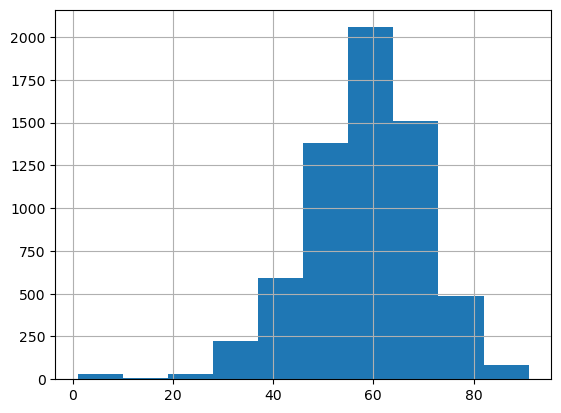

In [6]:
metadata["Patient Age"].hist()

In [7]:
metadata["Right-Diagnostic Keywords"].value_counts()

normal fundus                                                                         2705
moderate non proliferative retinopathy                                                 745
mild nonproliferative retinopathy                                                      472
cataract                                                                               250
pathological myopia                                                                    216
                                                                                      ... 
retinochoroidal coloboma，epiretinal membrane                                             1
vitreous degeneration，lens dust                                                          1
retinal pigment epithelial hypertrophy，moderate non proliferative retinopathy            1
optic disc edema                                                                         1
macular epiretinal membrane，laser spot，lens dust，mild nonproliferative retinopathy       1

### Label liegen in text vor, wir brauchen aber numerische Form. Label unterscheiden sich auch. Wir muessen sie auf eine Form bringen. Das wurde in dem Datensatz schon gemacht: M D G C...

In [8]:
#selecting the first 3 columns in the metadata
labels = metadata.iloc[:, 7:15]

#count values in the labels
labels.sum()

N    2101
D    2123
G     397
C     402
A     319
H     203
M     306
O    1588
dtype: int64

<Axes: >

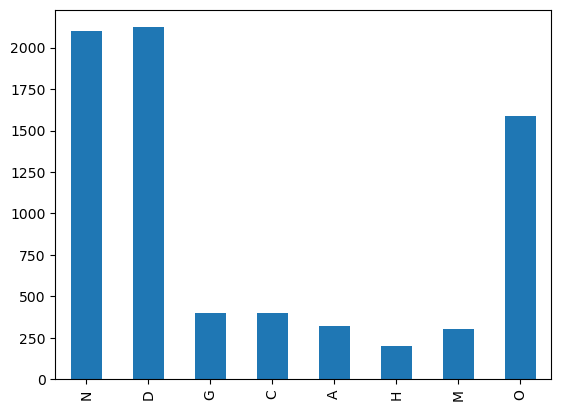

In [9]:
labels.sum().plot.bar()

Wir haben einen Bias, aber wir haben wenigstens fuer jedes Label ueber hundert Bilder.
Naechste Frage ist: Gibt es mehrere Kategorien gleichzeitig? 

In [10]:
labels

,N,D,G,C,A,H,M,O
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6387,0,1,0,0,0,0,0,0
6388,0,1,0,0,0,0,0,0
6389,0,1,0,0,0,0,0,0
6390,0,1,0,0,0,0,0,0


In [11]:
labels.sum(axis=1).value_counts() # es gibt doppelte labels aber in der Regel nur ein Label pro Bild

1    5391
2     955
3      46
dtype: int64

Multiclassprediction wuerde nicht funktionieren weil es auch Bilder ganz ohne Label gibt. (wenn man class O weglaesst)

## Have a look at some of the images

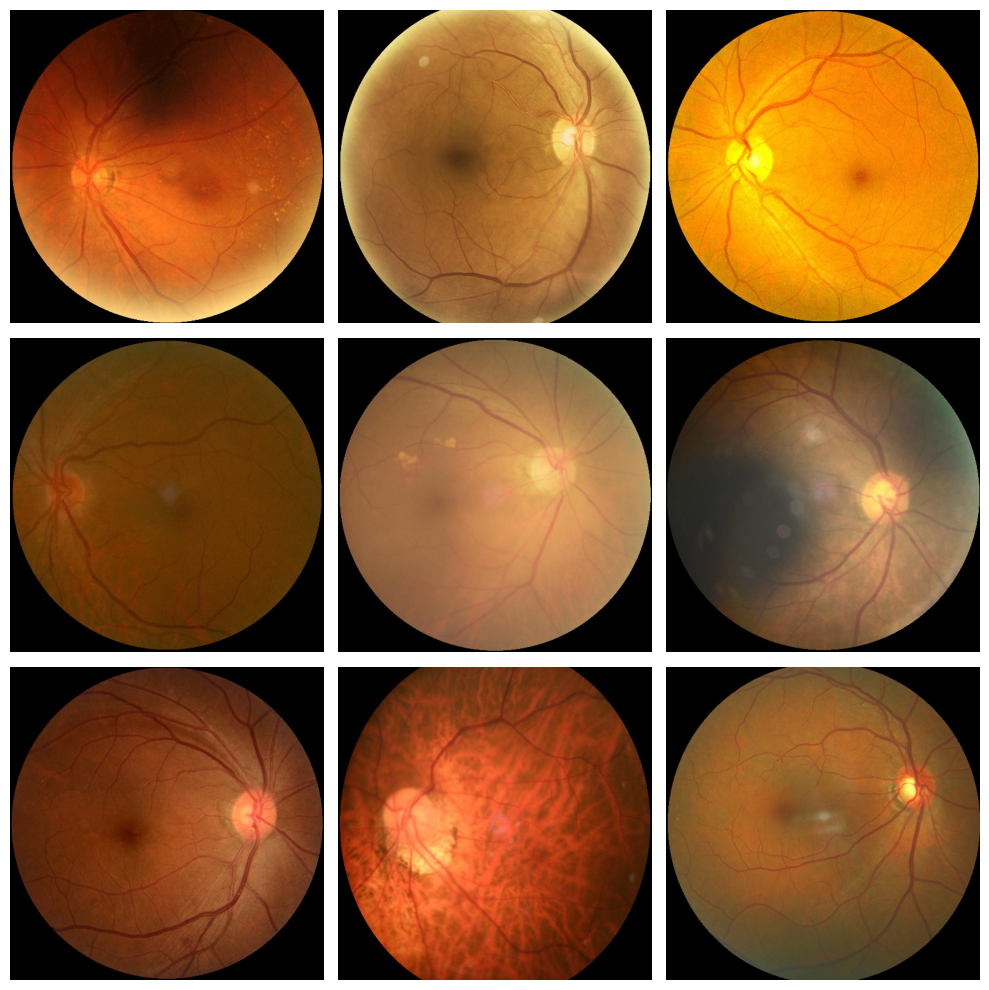

In [12]:
path_images = "data/ocular_disease_recognition_processed/preprocessed_images"

# Pick 9 random images
np.random.seed(1)
random_images = np.random.choice(metadata.filename, 9)

# Adjust the size of your images
plt.figure(figsize=(10,10))

# Iterate and plot random images
for i, filename in enumerate(random_images):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(path_images, filename))
    plt.imshow(img)
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

## Train/Test split
- How to split the data? Is a simple train/val/test split OK?
**Problem** Data Leakage: Gibt es IDs oefter? Diese duerfen nicht in beiden vorkommen. Oder diese werden eventuell uberbewertet. Auch muss beim Split darauf geachtet werden das die Labels ausgegelichen in den Splits sind sowie Alter und Geschlecht fair verteilt sind.

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(metadata, test_size=0.15,
                                     stratify=metadata[["H","C"]], #man waehlt oft das am wenigsten vorkommende label
                                     random_state=0
                                    )
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (5433, 19)
Test set size: (959, 19)


In [14]:
# second split
train_df, val_df = train_test_split(train_df, test_size=0.15,
                                    stratify = train_df[["H","C"]],
                                    random_state=0
                                    )
print(f"Training set size: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (4618, 19)
Validation set size: (815, 19)
Test set size: (959, 19)


<Axes: >

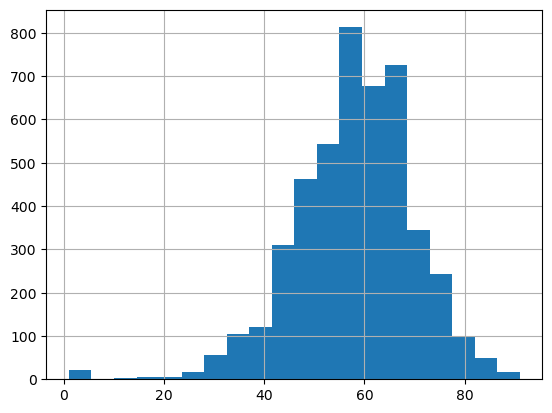

In [15]:
train_df["Patient Age"].hist(bins=20)

<Axes: >

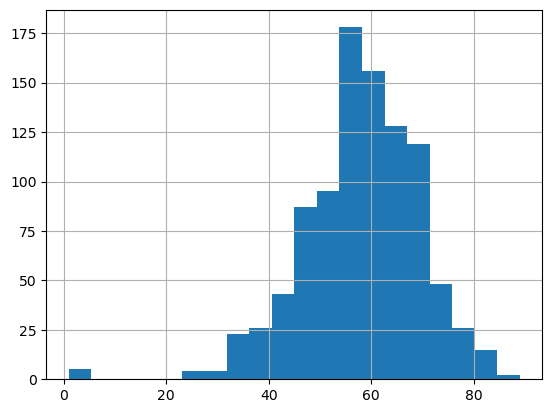

In [16]:
test_df["Patient Age"].hist(bins=20)

In beiden Splits liegen aehnliche Daten vor.

<Axes: >

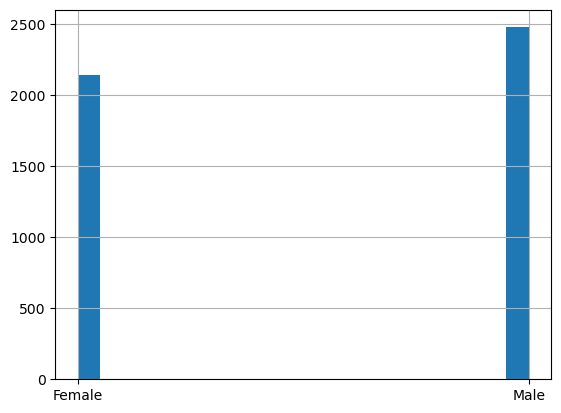

In [17]:
train_df["Patient Sex"].hist(bins=20)

<Axes: >

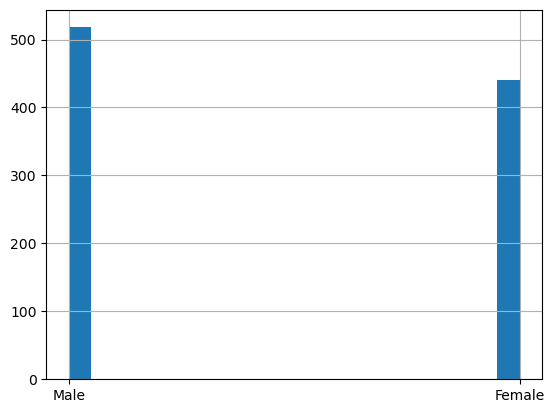

In [18]:
test_df["Patient Sex"].hist(bins=20)

## Data generators!

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize images
image_generator = ImageDataGenerator(
    rescale=1.0/255 #rescale the image to be between 0 and 1 instead of 0 and 255, better for the neural network
)

# Pick your label column(s), for start with 1 label
label_column = "C" #cataract

# Define the data generators
train_generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory=path_images,
        x_col="filename", #x_col is the column with the filenames
        y_col=label_column,
        target_size=(320,320),
        batch_size=32, #how many images are loaded at once. To high and you got a crash. The higher the faster the training but the more memory is needed
        class_mode="raw", #raw because we have only one label column which is already encoded in 0 and 1
        color_mode="rgb" #rgb because we have color images
)
val_generator = image_generator.flow_from_dataframe(
        dataframe=val_df,
        directory=path_images,
        x_col="filename",
        y_col=label_column,
        target_size=(320,320),
        batch_size=32,
        class_mode="raw",
        color_mode="rgb",
        shuffle = False) #im val dataset wollen wir nicht das er shuffelt sonst haben wir eine unterschiedliche Reihenfolge wenn wir auf val predicten

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

## Let's build a CNN and train it

In [77]:
train_generator.__getitem__(0)[1] #

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [87]:
inputs = Input(shape =(320,320,3)) #first create input layer for 320 rgb pictures

x = Conv2D(32, (3,3), activation="relu")(inputs) #lernt 32 Kernel von der Groesse 3x3
x = MaxPooling2D((2,2))(x) #reduziert das bild um faktor 2
x = Conv2D(64, (3,3), activation="relu")(x) 
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation="relu")(x) 
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation="relu")(x) 
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation="relu")(x) 
x = MaxPooling2D((2,2))(x)

#  Dense (decision) part
x = Flatten()(x)
x = Dense(64, activation="relu")(x) # durch diesen layer koennen noch komplexere Logiken betrachet werden
outputs = Dense(1, activation="sigmoid")(x) #abhaengig von Anzahl labels und wenn man labels von 0 und 1 hat dann ist sigmoid ganz gut, diese gibt immer werte zwischen 0 und 1

model = Model(inputs=inputs,outputs=outputs)
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 320, 320, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 318, 318, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 159, 159, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 157, 157, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 78, 78, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 76, 76, 128)       7385

Nach 3 Convs/Poolings haette man immer noch einen output von 38 pixeln. Das aehnelt immer noch stark einem Bild und viele Pixel wurden noch nicht von Conc betrachtet. So im 10,20,30er Bereich ist es optimal.

In [88]:
import tensorflow as tf

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
model.compile(optimizer='adam',
              loss="binary_crossentropy", #soll eine zahl zwischen 0 und 1 vorhersagen und ein punishment bekommen wenn er daneben liegt
              metrics=metrics)

In [89]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
145/145 [==============================] - 850s 6s/step - loss: 0.2483 - accuracy: 0.9372 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2275 - val_accuracy: 0.9362 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
145/145 [==============================] - 864s 6s/step - loss: 0.2317 - accuracy: 0.9372 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2509 - val_accuracy: 0.9362 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
145/145 [==============================] - 879s 6s/step - loss: 0.2301 - accuracy: 0.9372 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2090 - val_accuracy: 0.9362 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
 42/145 [=======>......................] - ETA: 10:18 - loss: 0.2229 - accuracy: 0.9368 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 

In [90]:
val_df.C.value_counts() # label hat starken bias

0    763
1     52
Name: C, dtype: int64

In [92]:
763/ (763+52) #das waere wenn das model immer 0 Vorhersagt. Bis zum 4 Epoch befindet sich das model auch noch in einem Minimum

0.9361963190184049

# Model evaluation

In [94]:
y_pred = model.predict(val_generator)

26/26 [==============================] - 38s 1s/step


In [95]:
y_pred

array([[0.02755656],
       [0.05375974],
       [0.02207053],
       [0.02638368],
       [0.02915066],
       [0.06733037],
       [0.02167938],
       [0.03421812],
       [0.0803664 ],
       [0.02511889],
       [0.04270821],
       [0.02935041],
       [0.0331104 ],
       [0.08635773],
       [0.03551948],
       [0.03254438],
       [0.04840314],
       [0.03363521],
       [0.02337775],
       [0.0327628 ],
       [0.0647369 ],
       [0.03645672],
       [0.02850737],
       [0.03744455],
       [0.03494257],
       [0.03319305],
       [0.01502818],
       [0.06763513],
       [0.03689225],
       [0.02534719],
       [0.07831834],
       [0.07375467],
       [0.01996864],
       [0.04623656],
       [0.04485673],
       [0.01895065],
       [0.14326477],
       [0.02466253],
       [0.0409653 ],
       [0.1571411 ],
       [0.03000906],
       [0.11345596],
       [0.04273735],
       [0.03793641],
       [0.02857718],
       [0.025353  ],
       [0.02538391],
       [0.035

In [97]:
y_true = val_generator.labels

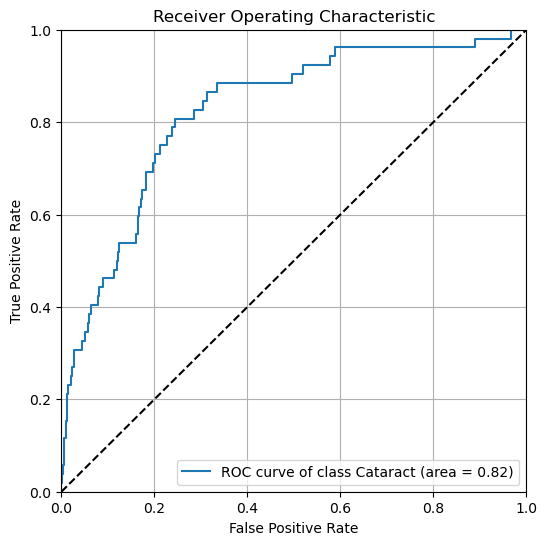

In [98]:
# Code for binary classification model

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(6, 6))

label = "Cataract"
#for i, label in enumerate(validation_generator.class_indices):
ax.plot(fpr, tpr, label='ROC curve of class {0} (area = {1:0.2f})'.format(label, roc_auc))

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.grid(True)
plt.show()

# Transfer Learning

In [99]:
from tensorflow.keras.applications import DenseNet121

In [102]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(320,320,3))# imagenet ist der grosse datensatz zumbildvorhersagen, includetop false schneidet den letzten layer ab, den wollen wir vgeben fuer unseren anwendungszweck

29084464/29084464 [==============================] - 2s 0us/step


In [103]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 326, 326, 3)  0          ['input_8[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 160, 160, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [104]:
from tensorflow.keras.layers import GlobalAveragePooling2D


x = base_model.output
x = GlobalAveragePooling2D()(x) #reduziert den letzten layer drastisch auf einen Wert pro Block(1024)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs= output)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 326, 326, 3)  0          ['input_8[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 160, 160, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [105]:
#wir wollen das net von keras nicht trainieren nur unseren letzten layer
for layer in base_model.layers:
    layer.trainable = False

In [109]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 326, 326, 3)  0          ['input_8[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 160, 160, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

### trainable paramaters sind nur noch die von unseren hinzugefuegten Denselayer. Die vom Base_model werden nicht mehr trainert. Die Gewichte bleibe gleich.

In [107]:
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
model.compile(optimizer='adam',
              loss="binary_crossentropy", #soll eine zahl zwischen 0 und 1 vorhersagen und ein punishment bekommen wenn er daneben liegt
              metrics=metrics)

In [108]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
  6/145 [>.............................] - ETA: 15:17 - loss: 0.4029 - accuracy: 0.8073 - precision: 0.1111 - recall: 0.1875

KeyboardInterrupt: 

# fertig aber am besetn noch class weights noch einbauen

In [ ]:
# Code for multi-class model

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

classes = label_column

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))

# Get class names
class_names = list(classes)

for i, label in enumerate(classes):
    ax.plot(fpr[i], tpr[i],
            label=f"ROC curve -> {class_name_dict[label]} (area = {roc_auc[i]:.2f})")

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Calculate class weights
class_weights = train_df[label_column].sum(axis=0)
class_weights = class_weights.sum() / class_weights 

# Ensure class weights sum up to 1
class_weights = class_weights / class_weights.sum()
class_weights

In [ ]:
def weighted_binary_crossentropy(class_weights):
    def _weighted_binary_crossentropy(y_true, y_pred):
        binary_crossentropy = keras.losses.binary_crossentropy(y_true, y_pred)
        weight_vector = y_true * class_weights[1] + (1. - y_true) * class_weights[0]
        weighted_loss = weight_vector * binary_crossentropy
        return tf.reduce_mean(weighted_loss)
    return _weighted_binary_crossentropy

In [ ]:
metadata["C"].sum() / metadata.shape[0]

In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    return 0

metadata["left_cataract"] = metadata["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
metadata["right_cataract"] = metadata["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
metadata.head(3)

In [ ]:
left_cataract = metadata.loc[(metadata.C ==1) & (metadata.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

In [ ]:
right_cataract = metadata.loc[(metadata.C == 1) & (metadata.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

In [ ]:
df = metadata
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

In [ ]:


cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)



In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import load_img,img_to_array

dataset_dir = "../../../Data/ocular_disease_recognition/preprocessed_images/"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset
        



In [ ]:
from tqdm.notebook import tqdm
import random

dataset = create_dataset(cataract, 1)

In [ ]:
len(dataset)

In [ ]:
metadata["Left-Fundus"]

In [ ]:


dataset = create_dataset(normal,0)



In [ ]:


len(dataset)



In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image[:,:,::-1])
    plt.xlabel(label)
plt.tight_layout()    

In [ ]:
X = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



In [ ]:
X_train.shape, X_test.shape

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))



In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,save_freq=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    #callbacks=[checkpoint,earlystop]
                   )

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


# Define the input shape
inputs = Input(shape=(224, 224, 3))

# Define the CNN architecture
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

model.summary()

In [ ]:
import tensorflow as tf

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=metrics)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    #callbacks=[checkpoint,earlystop]
                   )

In [ ]:
y_test

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Assuming validation_generator has shuffle=False

# Get the predicted probabilities from the model
y_pred = model.predict(X_test)

In [ ]:
1 * (y_pred > 0.5)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

    
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(6, 6))

#for i, label in enumerate(validation_generator.class_indices):
ax.plot(fpr, tpr, label='ROC curve of class {0} (area = {1:0.2f})'.format(label, roc_auc))

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.grid(True)
plt.show()

# 3 classes

In [ ]:
metadata.columns

In [ ]:
metadata.filename.str.split("_", expand=True)[1].value_counts()

In [ ]:
metadata.ID.value_counts()

In [ ]:
label_column = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
metadata[label_column].sum(axis=1).value_counts()

In [ ]:
metadata[label_column].sum(axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(metadata, test_size=0.15,
                                     random_state=0
                                    )
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

In [ ]:
# second split
train_df, val_df = train_test_split(train_df, test_size=0.15,
                                    random_state=0
                                    )
print(f"Training set size: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")
print(f"Test set size: {test_df.shape}")

In [ ]:
# Normalize images
image_generator = ImageDataGenerator(
    rescale=1.0/255
)

label_column = ['N', 'D', 'G', 'C', 'A', 'H', 'M']
path_images = "../../../Data/ocular_disease_recognition/preprocessed_images/"

# Define the data generators
train_generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=path_images,
    x_col="filename",
    y_col=label_column,
    target_size=(320, 320),
    batch_size=32,
    class_mode="raw",
    color_mode="rgb",
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=val_df,
    directory=path_images,
    x_col="filename",
    y_col=label_column,
    target_size=(320, 320),
    batch_size=32,
    class_mode="raw",
    color_mode="rgb",
    shuffle=False
)

In [ ]:
train_df[label_column].sum(axis=0)

In [ ]:
class_weights = dict()

num_samples = train_df.shape[0]

for key, value in train_df[label_column].sum(axis=0).to_dict().items():
    class_weights[key] = (num_samples / value) / 3

class_weights

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the DenseNet121 model but exclude the top layer (classification layer)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(320, 320, 3))

# Add your own top layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(label_column), activation='sigmoid')(x)

# Create the actual model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

In [ ]:
# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=metrics)

In [ ]:
# Train the model
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    #class_weight=class_weights,
    epochs=10,
    verbose=1
)

In [ ]:
validation_generator.__getitem__(0)[1]

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels_val[:, i],
                                  predictions_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 10))
for i, label in enumerate(classes):
    plt.plot(fpr[i], tpr[i],
             label=f"ROC curve of class {label} (area = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Collect all true labels and predictions
y_true = validation_generator.labels
y_pred = model.predict(validation_generator, steps=len(validation_generator))

In [ ]:
# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

classes = label_column

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))

# Get class names
class_names = list(classes)

for i, label in enumerate(classes):
    ax.plot(fpr[i], tpr[i],
            label=f"ROC curve -> {class_name_dict[label]} (area = {roc_auc[i]:.2f})")

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Calculate class weights
class_weights = train_df[label_column].sum(axis=0)
class_weights = class_weights.sum() / class_weights 

# Ensure class weights sum up to 1
class_weights = class_weights / class_weights.sum()
class_weights

In [ ]:
def weighted_binary_crossentropy(class_weights):
    def _weighted_binary_crossentropy(y_true, y_pred):
        binary_crossentropy = keras.losses.binary_crossentropy(y_true, y_pred)
        weight_vector = y_true * class_weights[1] + (1. - y_true) * class_weights[0]
        weighted_loss = weight_vector * binary_crossentropy
        return tf.reduce_mean(weighted_loss)
    return _weighted_binary_crossentropy

In [ ]:
# Now: unfreeze some of the base model layers and do a second pass of training
for layer in model.layers[:300]:
    layer.trainable = False
for layer in model.layers[300:]:
    layer.trainable = True

# We use a smaller learning rate for fine-tuning
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_generator, 
    validation_data=validation_generator,
    class_weight=class_weights,
    epochs=10
)